<a href="https://colab.research.google.com/github/obaniah/Assignment-5-CS-4783-5783---Oday-Bani-Ahmad/blob/main/Q1_%2C_Q2_%2CQ3%2C_Q4__Assignment_5_CS_4783_5783_oday_Bani_Ahmad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1**.  Support you want to build a decision tree. What is the initial entropy of the target variable taste? 

---



There are two separate classes in the training data set mentioned above m = 2. Assume that C1 : "Meh" and C2 : "Yummy." 10 records are available. Here, "Meh" and "Yummy" both equal 5.
The formula for Info(D) is as follows:


Info(D) is equal to -5/10 log2(5/10), which equals **1.0 bits**

**Q2**. Consider that the variable Visual defects is chosen as the root of the decision tree. What is the information gain of the decision tree? 


---



3 Some, 4 None, and 3 Many are visual deficiencies. 
3 of the some are "Meh"
2 of the 4 None are "Meh"  
2 are "Yummy" 
3 are "Yummy" in 3 Many.

So,
InfoVisual defects(D)= 3/10*(-3/3log23/3)+4/10*(-2/4log22/4 - 2/4log22/4)+3/10*(-3/3log23/3)= **0.4 bits.**

Gain(Visual defects) = Info(D)- InfoVisual 
defects(D)= 1.0-0.4 = **0.6 bits.**



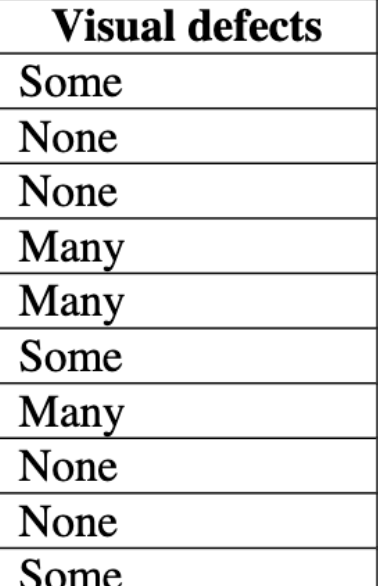


**Q3**. What is entropy H(Taste|Visual Defect == Some) and the entropy H(Taste|Visual Defect == None)? 

---



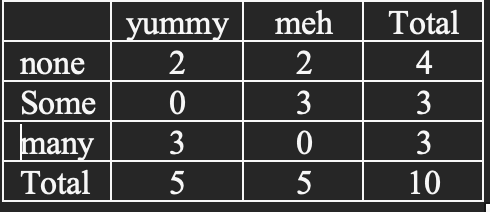

None  : 4 , 
Some  : 3 , 
many  : 3 , 
Total : 10

There are two classes in "tase": "Meh" and "Yummy".

Meh   : 5 , 
Yummy : 5



Using simple log algebra method
---


Entropy H(Taste|Visual Defect == some) = - 3/3log2(3/3) - 0log2(0) = 0 - 0 = **0**    




Using simple log algebra method
---


Entropy H(Taste|Visual Defect == none).= - 2/4log2(2/4) - 2/4log2(2/4) = - 1/2 - 1/2 = **1** 

**Q4**. 
In this question, you will be using k-means to perform image compression. Implement a naïve version of 
the k-means algorithm based on your understanding. Your code must take the number of clusters k as input 
and  perform  k-means  clustering  on  the  given  image.  Once  the  algorithm  finishes  running,  the  cluster 
centroids represent the top-k common colors in the image. Iterate through each pixel in the image and assign 
the closest color to each pixel. Save and visualize the resulting image. For reading and writing images, you 
can use OpenCV, which is an open-source computer vision toolkit. The following code will load the image 
into a NumPy array. You can use this as input to your K-Means algorithm. 

---



In [57]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import misc
import imageio

In [28]:
img = cv2.imread('input.png')  
img

array([[[103, 180, 219],
        [116, 185, 230],
        [110, 186, 226],
        ...,
        [ 13,  15,  14],
        [ 12,  15,  13],
        [ 12,  14,  12]],

       [[119, 193, 230],
        [120, 192, 224],
        [124, 192, 226],
        ...,
        [ 13,  16,  16],
        [ 10,  15,  14],
        [  9,  14,  11]],

       [[123, 191, 228],
        [121, 191, 228],
        [118, 185, 220],
        ...,
        [ 13,  16,  14],
        [ 11,  13,  13],
        [ 10,  15,  11]],

       ...,

       [[ 16,  18,  15],
        [ 18,  21,  18],
        [ 16,  19,  18],
        ...,
        [ 45,  45,  81],
        [ 35,  43,  70],
        [ 43,  51,  72]],

       [[ 17,  17,  16],
        [ 19,  18,  17],
        [ 20,  19,  20],
        ...,
        [ 40,  38,  80],
        [ 40,  39,  68],
        [ 42,  43,  59]],

       [[ 19,  19,  15],
        [ 18,  20,  20],
        [ 17,  19,  18],
        ...,
        [ 39,  43,  65],
        [ 38,  37,  58],
        [ 34,  39,  52]]

In [29]:
height, width, channels = np.shape(img)

In [30]:
height

128

In [31]:
width

128

In [32]:
channels

3

In [48]:
def read_image():
    img = cv2.imread('input.png')
    img = img / 255

    return img
    

In [49]:
def initialize_means(img, clusters):
    points = np.reshape(img, (img.shape[0] * img.shape[1],
                              img.shape[2]))
    m, n = points.shape
    means = np.zeros((clusters, n))

    for i in range(clusters):
        rand1 = int(np.random.random(1) * 10)
        rand2 = int(np.random.random(1) * 8)
        means[i, 0] = points[rand1, 0]
        means[i, 1] = points[rand2, 1]

    return points, means

In [50]:
def distance(x1, y1, x2, y2):
    dist = np.square(x1 - x2) + np.square(y1 - y2)
    dist = np.sqrt(dist)

    return dist

In [51]:
def k_means(points, means, clusters):
    iterations = 10
    m, n = points.shape

    index = np.zeros(m)

    while (iterations > 0):

        for j in range(len(points)):

            minv = 1000
            temp = None

            for k in range(clusters):

                x1 = points[j, 0]
                y1 = points[j, 1]
                x2 = means[k, 0]
                y2 = means[k, 1]

                if (distance(x1, y1, x2, y2) < minv):
                    minv = distance(x1, y1, x2, y2)
                    temp = k
                    index[j] = k

        for k in range(clusters):

            sumx = 0
            sumy = 0
            count = 0

            for j in range(len(points)):

                if (index[j] == k):
                    sumx += points[j, 0]
                    sumy += points[j, 1]
                    count += 1

            if (count == 0):
                count = 1

            means[k, 0] = float(sumx / count)
            means[k, 1] = float(sumy / count)

        iterations -= 1

    return means, index

In [58]:
def compress_image(means, index, img):
    centroid = np.array(means)
    recovered = centroid[index.astype(int), :]

    recovered = np.reshape(recovered, (img.shape[0], img.shape[1],
                                       img.shape[2]))

    plt.imshow(recovered)
    plt.show()

    imageio.imwrite('compressed_' + str(clusters) +
                '_colors.png', recovered)


Enter the number of colors in the compressed image. default = 16
3


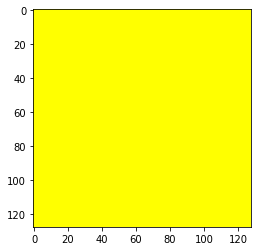

In [59]:
if __name__ == '__main__':
    img = cv2.imread('input.png') 

    clusters = 16
    clusters = int(input('Enter the number of colors in the compressed image. default = 16\n'))

    points, means = initialize_means(img, clusters)
    means, index = k_means(points, means, clusters)
    compress_image(means, index, img)


In [54]:
points

array([[103, 180, 219],
       [116, 185, 230],
       [110, 186, 226],
       ...,
       [ 39,  43,  65],
       [ 38,  37,  58],
       [ 34,  39,  52]], dtype=uint8)

In [55]:
means

array([[ 34.60739709,  40.99628598,   0.        ],
       [ 97.34366108, 142.21150806,   0.        ],
       [182.57424917, 210.87791991,   0.        ]])

In [56]:
index

array([1., 1., 1., ..., 0., 0., 0.])

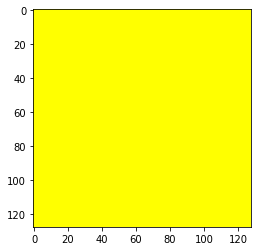

In [60]:
compress_image(means, index, img)